<a href="https://colab.research.google.com/github/lrnrdr/Classification-Cirrhosis-PredictionDataset/blob/main/Prediction_of_Cirrhosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### By: Loraine Rodriguez




---



## Reference: **Cirrhosis Prediction Dataset**
https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset/data



---



## ⌨ Data Dictionary:

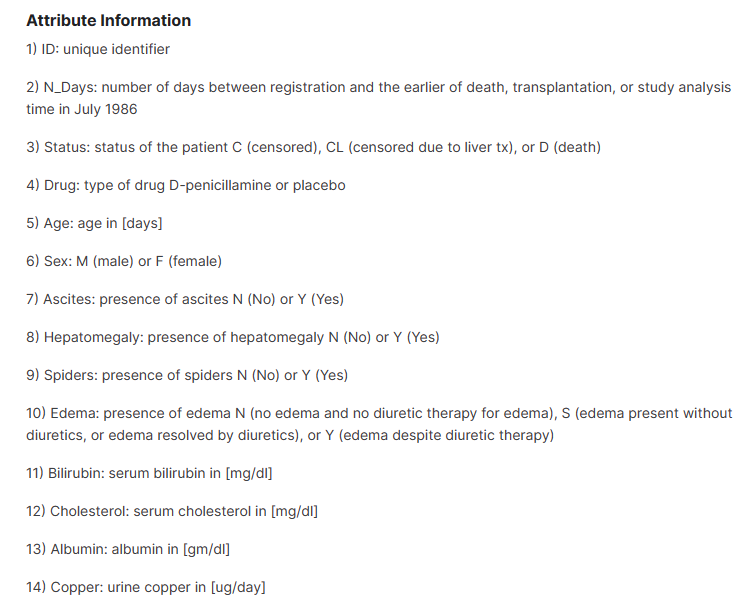

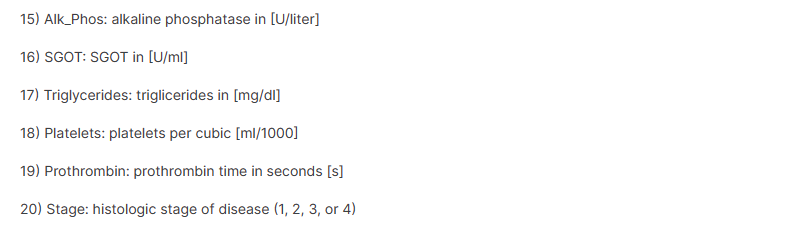



---



# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



# ⚓ Imports:

In [2]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## MatPlotLib
import matplotlib.pyplot as plt

## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Classifiation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score


## Set global scikit-learn configuration
from sklearn import set_config

## Warnings
import warnings

In [3]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

#### **Pandas Display Configurations**

In [4]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

#### **SK Learn Display Configuration**

In [5]:
## SK Learn Display
set_config(display='diagram')

## Transformers output as a Pandas Dataframe
set_config(transform_output='pandas')



---



# ⏫ Upload Data:

In [6]:
# Load data
fpath = '/content/drive/MyDrive/CodingDojo/06-AdvancedML/Week21/Data/cirrhosis.csv'
df = pd.read_csv(fpath)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi



---



# 🧹 Clean Data:



---



### **Remove Unnecessary Columns**

In [8]:
## Drop a single column
df.drop(columns = 'ID', inplace = True)



---



## ➿ Check for Duplicates:

In [9]:
# Display the count the duplicate rows
df.duplicated().sum()

0

In [10]:
## Drop duplicate rows
df = df.drop_duplicates()

In [11]:
# Display the count the duplicate rows to check there are no more
df.duplicated().sum()

0

😸 There are 0 duplicate rows remaining



---



## Check for missing values.

In [12]:
## Display of the count of missing values by column
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1033 missing values.


In [13]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64



---



In [14]:
## Replace D-penicillamine with 1 and placebo with 0 for easy reading later with modeling
df['Drug'].replace({'D-penicillamine':1, 'Placebo':0}, inplace=True)
df['Drug'].value_counts(dropna=False)

1.0    158
0.0    154
NaN    106
Name: Drug, dtype: int64

In [15]:
# Dropping Null values from Drug column, since this is the target and this won't be simple imputed later
df = df.dropna(subset=["Drug"])

In [16]:
df['Drug'].value_counts(dropna=False)

1.0    158
0.0    154
Name: Drug, dtype: int64

## 👓 Inspect unusual numbers

In [17]:
# Desriptive statitistics for all number columns
df.describe(include='number')

,N_Days,Drug,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,2006.362179,0.506410,18269.442308,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,1123.280843,0.500762,3864.805407,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,41.000000,0.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1191.000000,0.000000,15427.750000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,1839.500000,1.000000,18187.500000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,2697.250000,1.000000,20715.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,4556.000000,1.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


* Observations: No unusal numbers found



---



## Check object columns

In [18]:
# Desriptive statitistics for all object columns
df.describe(include='object')

,Status,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,312,312,312,312,312,312
unique,3,2,2,2,2,3
top,C,F,N,Y,N,N
freq,168,276,288,160,222,263


In [19]:
## Create a list of string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

## Evaluating string/object columns for issues

In [20]:
## Loop through the list of string columns for issues
for col in string_cols:
  ## Print the column name
  print(col)
  ## print the value counts for the column
  print(df[col].value_counts(dropna=False))
  ## Print an empty line for readability
  print()

Status
C     168
D     125
CL     19
Name: Status, dtype: int64

Sex
F    276
M     36
Name: Sex, dtype: int64

Ascites
N    288
Y     24
Name: Ascites, dtype: int64

Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64

Spiders
N    222
Y     90
Name: Spiders, dtype: int64

Edema
N    263
S     29
Y     20
Name: Edema, dtype: int64



## **No issues noted in object/string columns. Missing Values will be addressed later in the process**



---

## Column observations:

**Numerical Columns:**

1. Cholesterol (Missing Values)
2. Copper (Missing Values)
3. Alk_Phos (Missing Values)
4. SGOT (Missing Values)
5. Tryglicerides (Missing Values)
6. Platelets (Missing Values)
7. Prothrombin (Missing Values)
8. N_Days
9. Age
10. Bilirubin
11. Albumin
12. Stage (Missing Values)



**Categorical Nominal Columns:**

1. Status
2. Drug (Missing Values) (***TARGET***)
3. Sex
4. Ascites (Missing Values)
5. Hepatomegaly (Missing Values)
6. Spiders (Missing Values)
7. Edema




---



# **EDA**




In [21]:
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



# Exploratory Visualation #1

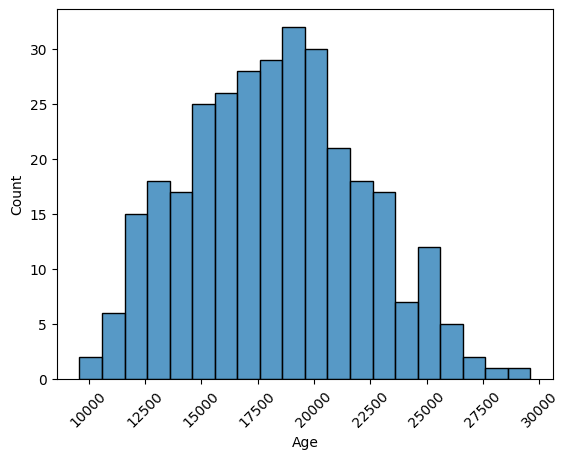

In [22]:
ax = sns.histplot(data=df, x='Age', binwidth=1_000)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

# Exploratory Visualation #2

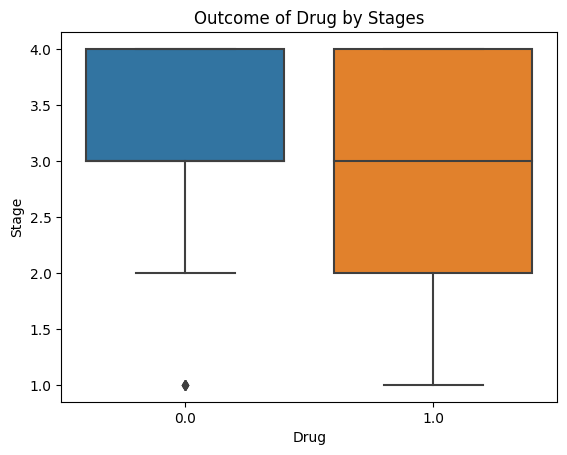

In [23]:
# Horizontal grouped boxplot in seaborn
ax = sns.boxplot(data=df, y='Stage', x="Drug")
ax.set_title("Outcome of Drug by Stages");



---



# Explanatory Visualation #1

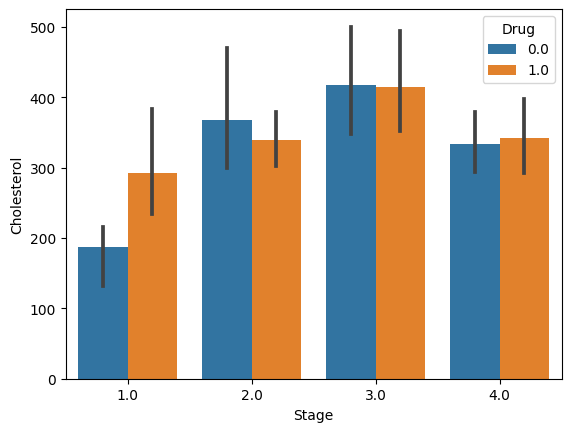

In [24]:
# Using seaborn to plot the group means by Buildign Type colored by Drug
# 0 is Placebo and 1 is D-penicillamine
ax = sns.barplot(data=df, x="Stage", y="Cholesterol", hue='Drug')


High cholesterol generally means your total cholesterol is 200 mg/dL or higher.

Reference: https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

All stages had high cholesterol of >200 mg/dl while on Drug D.   The placebos and D-penicillamine performed neck and neck through most of the stages with an exception to stage 1 which D-penicillamine had a Cholesterol of ~300 mg/dl and placebo had just under 200 mg/dl.  Given that the placebo's performed so close to D-penicillamine, it doesn't seem as if this drug was effective when evaluating Cholestrol and the stages.

# Explanatory Visualization #2

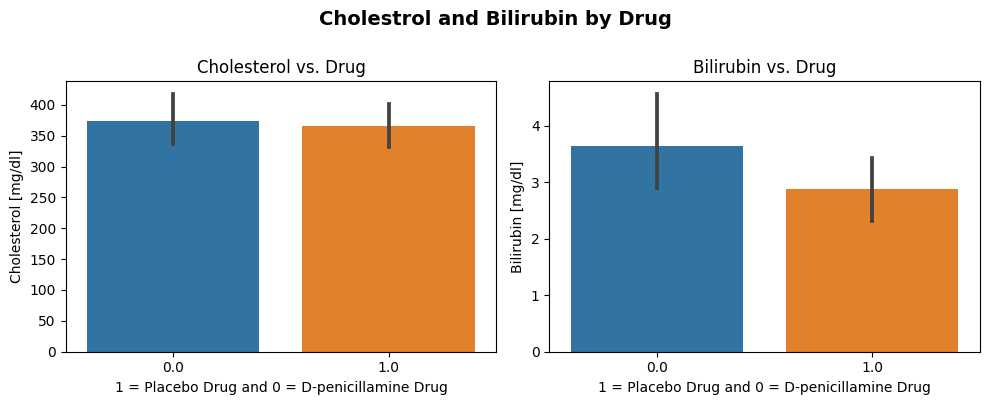

In [25]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(ncols = 2, figsize = (10,4))

## Define a MatplotLib ax object using sns.barplot() for ax=axes[0]
sns.barplot(data = df,
            x='Drug',
            y='Cholesterol',
            ax = axes[0])
## Set the Title
axes[0].set_title('Cholesterol vs. Drug')
## Set the X axis label
axes[0].set_xlabel('1 = Placebo Drug and 0 = D-penicillamine Drug')
## Set the Y axis label
axes[0].set_ylabel('Cholesterol [mg/dl]')

## Define a MatplotLib ax object using sns.barplot() for ax=axes[1]
sns.barplot(data=df,
            x='Drug',
            y='Bilirubin',
            ax = axes[1])
## Set the Title
axes[1].set_title('Bilirubin vs. Drug')
## Set the X axis label
axes[1].set_xlabel('1 = Placebo Drug and 0 = D-penicillamine Drug')
## Set the Y axis label
axes[1].set_ylabel('Bilirubin [mg/dl]')

## Set the Suptitle
fig.suptitle('Cholestrol and Bilirubin by Drug', fontsize=14, fontweight='bold', y=1.0)

## Set tight layout
fig.tight_layout();

There isn't a big difference between Cholesterol in both D-penicillamine and the Placebo, so I don't think the drug effects cholesterol.   I can see that the cholestrol average is oer 200 so that is high cholestrol.   

For Bilirubin there is a slight difference between both D-penicillamine and the Placebo levels.  The ones on D-penicillamine had lower Bilirubin vs the ones taking the placebo, but its slight.



---



### **Check Class Balance**

In [26]:
# Check how many samples of each class are present
df['Drug'].value_counts(normalize=False)

1.0    158
0.0    154
Name: Drug, dtype: int64

In [27]:
# Check how many samples of each class are present
df['Drug'].value_counts(normalize=True)

1.0    0.50641
0.0    0.49359
Name: Drug, dtype: float64



---



# Define Features and Target and Train-Test Split

In [28]:
#Define target and features
y = df['Drug']
X = df.drop(columns = 'Drug')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [29]:
# balance check
y_train.value_counts(normalize=True)

1.0    0.508547
0.0    0.491453
Name: Drug, dtype: float64

# Create the Preprocessor for ColumnTransformer

## Numerical Pipleline

In [30]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(impute_median,scaler)

# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipeline, num_cols)

Numeric Columns: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [31]:
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

## Categorical Pipeline (Nominal)

In [32]:
## Isolate categorical features
cat_cols = X_train.select_dtypes("object").columns
print("Categorical Features:", cat_cols)

## Instantiate the transformers
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Instantiate the pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

## Define the categorical nominal tuple
cat_tuple = ('Categorical',cat_pipe, cat_cols)


Categorical Features: Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')




---



## Create ColumnTransformer

In [33]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([num_tuple,
                                       cat_tuple],
                                       remainder='drop', verbose_feature_names_out=False)

# Fit the Column Transformer on the Training Data Only

In [34]:
# Fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                  verbose_feature_names_out=False)

# Transform Both Training and Testing Data

In [35]:
set_config(transform_output='pandas')

In [36]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)



---



# Check the Result

In [37]:
# Display the first (5) rows of the dataframe
display(X_train_processed.head())

# Check the shape
print(f'\nshape of processed data is: {X_train_processed.shape}')

# Check for remaining missing values
print(f'\nThere are {X_train_processed.isna().sum().sum()} missing values')

# Check the data types
print(f'\nThe datatypes are {X_train_processed.dtypes}')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
57,2.157892,-0.492018,-0.576630,-0.553578,1.326505,-0.285690,1.676818,-1.169404,-0.074947,-0.077183,-0.175030,-2.268192,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
246,-1.133271,-0.816863,0.581027,6.087040,-1.640557,-0.105437,0.701367,0.638623,0.252129,0.324855,-0.765757,-0.056705,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
85,-0.316441,0.302433,0.345208,5.581088,-0.738570,-0.263158,0.248747,-0.716416,0.797256,-0.870950,0.120333,-0.056705,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
101,0.956931,0.672167,-0.533753,-0.526473,1.065403,0.829627,-0.638830,-1.075916,-0.604498,-1.417310,-0.667302,-2.268192,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
188,0.389124,0.097645,-0.448001,-0.020521,0.258363,-0.522272,-0.123947,-0.439877,0.641506,-0.097800,-0.864211,-0.056705,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0



shape of processed data is: (234, 26)

There are 0 missing values

The datatypes are N_Days            float64
Age               float64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage             float64
Status_C          float64
Status_CL         float64
Status_D          float64
Sex_F             float64
Sex_M             float64
Ascites_N         float64
Ascites_Y         float64
Hepatomegaly_N    float64
Hepatomegaly_Y    float64
Spiders_N         float64
Spiders_Y         float64
Edema_N           float64
Edema_S           float64
Edema_Y           float64
dtype: object


# ✅ confirmed there are 0 missing values and all floats

#### Evaluation Functions

 Goal reminder: build a machine learning model to predict whether or not an office room is occupied, based on certain measurements included in the dataset.

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}


    return results_dict


# Logistic Regression

In [39]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(random_state=42)
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59       115
         1.0       0.60      0.63      0.62       119

    accuracy                           0.60       234
   macro avg       0.60      0.60      0.60       234
weighted avg       0.60      0.60      0.60       234



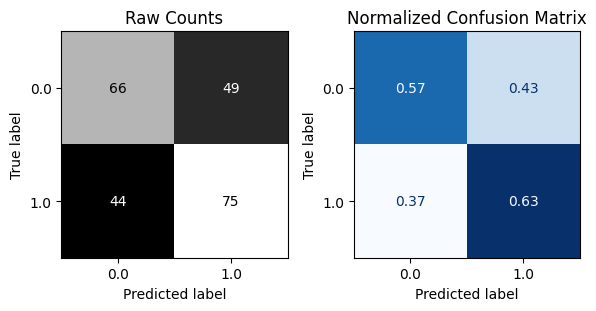


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55        39
         1.0       0.58      0.72      0.64        39

    accuracy                           0.60        78
   macro avg       0.61      0.60      0.60        78
weighted avg       0.61      0.60      0.60        78



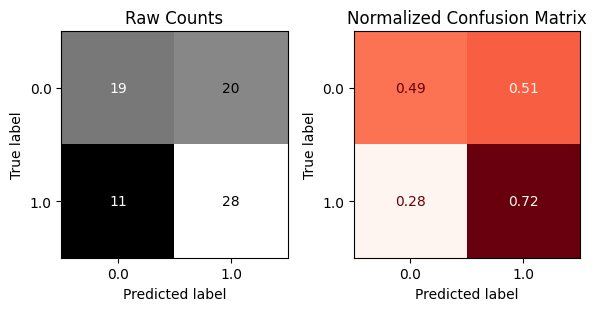

In [40]:
# Evaluate the default model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

In [41]:
# get params

logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
          'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
          'Stage'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='

In [42]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]



In [43]:
# Instantiate gridsearch (using 'recall_macro' to reduce type 2 errors)
gs = GridSearchCV(logreg_pipe, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       115
         1.0       0.60      0.60      0.60       119

    accuracy                           0.59       234
   macro avg       0.59      0.59      0.59       234
weighted avg       0.59      0.59      0.59       234



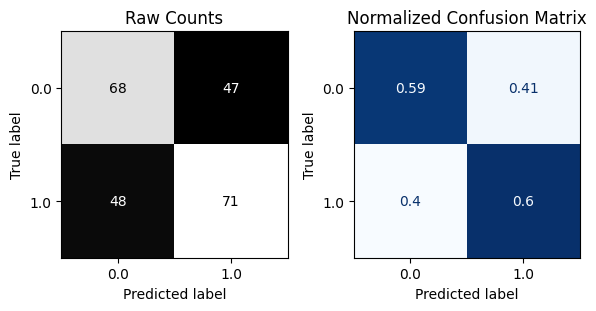


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.46      0.51        39
         1.0       0.55      0.67      0.60        39

    accuracy                           0.56        78
   macro avg       0.57      0.56      0.56        78
weighted avg       0.57      0.56      0.56        78



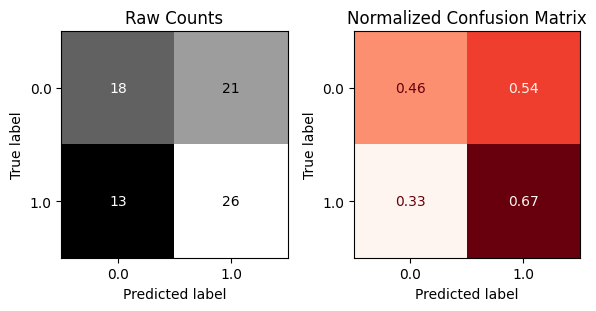

In [44]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

- The tuned Logistic Reg Model did not do better than the default model.   

-I would say the (l2_params) led to the best tuned model when looking at Logistic Regression.

# random forest

In [45]:
# Instantiate default random forest model
rf = RandomForestClassifier(random_state = 42)
# Pipeline
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [46]:
# Fit Pipeline
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00       119

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234



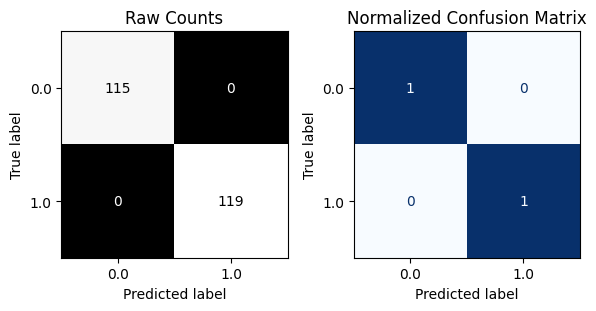


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54        39
         1.0       0.53      0.49      0.51        39

    accuracy                           0.53        78
   macro avg       0.53      0.53      0.52        78
weighted avg       0.53      0.53      0.52        78



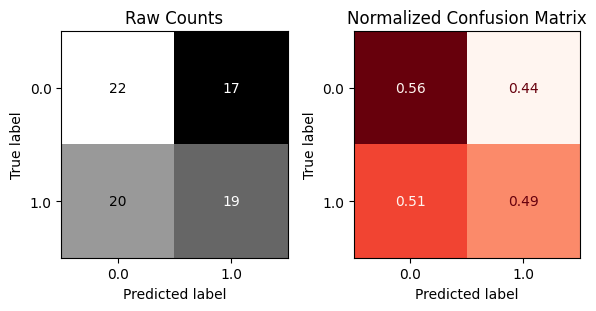

In [47]:
#Evaluate
evaluate_classification(rf_pipe,X_train,y_train,X_test,y_test)

In [48]:
# Default RandomForest params
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
          'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
          'Stage'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='

In [49]:
rf_params = {'randomforestclassifier__max_features': [6, 7, 8, 9, 10], 'randomforestclassifier__min_samples_leaf':[1, 2, 3],
             'randomforestclassifier__min_samples_split': [10, 15]}

In [50]:
# Instantiate Gridsearch
rf_gridsearch = GridSearchCV(rf_pipe, rf_params, n_jobs = -1, cv = 3, verbose = 1, scoring='recall_macro')

In [51]:
# Fit rf_gridsearch on training data
rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      d...
                                                                         Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [6, 7, 8, 9,
                                                                  10],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                         'randomforestclassifier__min_samples_split': [10, 15]},
             scoring='recall_macro', verbose=1)

In [52]:
# Obtain best parameters
rf_gridsearch.best_params_

{'randomforestclassifier__max_features': 9,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 10}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       115
         1.0       0.99      1.00      1.00       119

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234



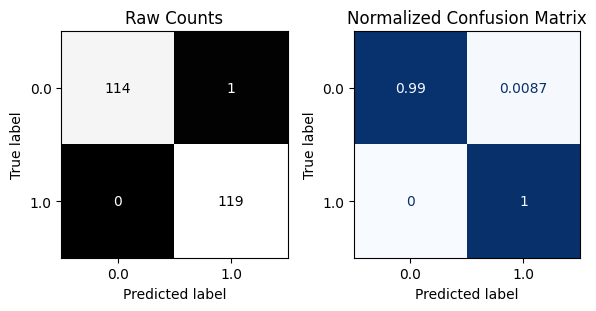


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.49        39
         1.0       0.51      0.56      0.54        39

    accuracy                           0.51        78
   macro avg       0.51      0.51      0.51        78
weighted avg       0.51      0.51      0.51        78



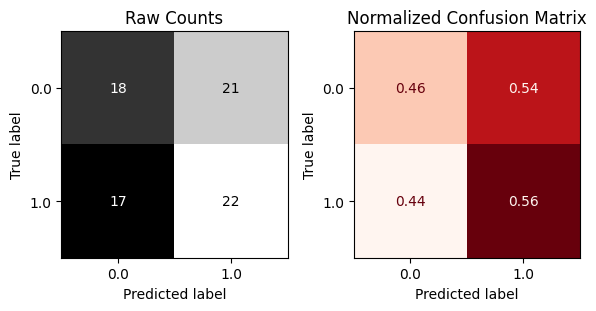

In [53]:
# Define and refit best model
best_rf = rf_gridsearch.best_estimator_
evaluate_classification(best_rf, X_train, y_train, X_test, y_test)

-The tuned RF model did not perform better than the default.

- The default Logistic Regression Model performed then all models so far.

# KNN




In [54]:
# Instantiate default KNN
knn = KNeighborsClassifier()
# KNN Pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit model on training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       115
         1.0       0.70      0.73      0.71       119

    accuracy                           0.70       234
   macro avg       0.70      0.70      0.70       234
weighted avg       0.70      0.70      0.70       234



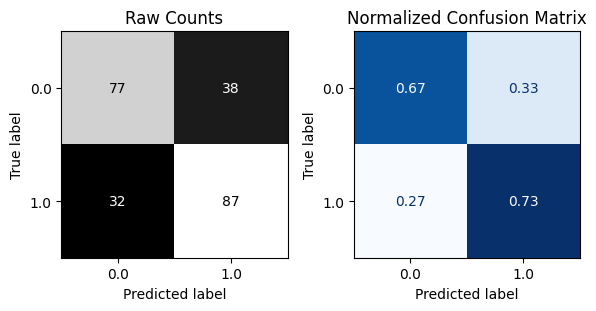


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.51      0.62      0.56        39
         1.0       0.52      0.41      0.46        39

    accuracy                           0.51        78
   macro avg       0.51      0.51      0.51        78
weighted avg       0.51      0.51      0.51        78



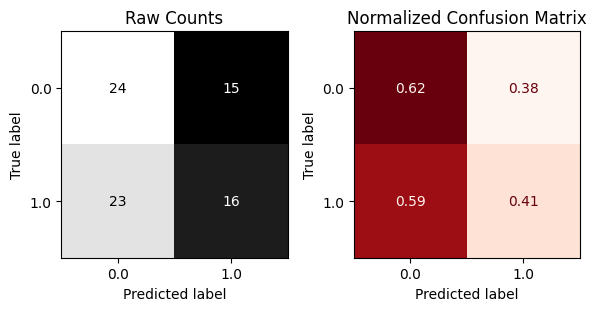

In [55]:
# Evaluate Default KNN Model
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

### **Tune the Hyperparameters**

In [56]:
# Get params
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
          'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
          'Stage'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='

In [57]:
# Tune K with GridSearchCV
params = {'kneighborsclassifier__n_neighbors':range(1,15),
          'kneighborsclassifier__weights':['uniform', 'distance']}

In [58]:
# Display the value counts for y_train (the target)
y_train.value_counts(normalize=True)

1.0    0.508547
0.0    0.491453
Name: Drug, dtype: float64

In [59]:
%%time
# Visualize Accuracy Scores.
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())

#Which scoring method should we use?
knn_gs = GridSearchCV(knn_pipe, params, scoring='recall').fit(X_train, y_train)
knn_gs.best_params_

CPU times: user 9.68 s, sys: 40 ms, total: 9.72 s
Wall time: 7.78 s


{'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'uniform'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62       115
         1.0       0.63      0.61      0.62       119

    accuracy                           0.62       234
   macro avg       0.62      0.62      0.62       234
weighted avg       0.62      0.62      0.62       234



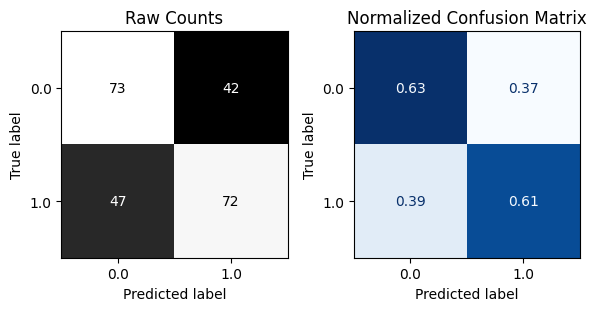


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.43      0.51      0.47        39
         1.0       0.41      0.33      0.37        39

    accuracy                           0.42        78
   macro avg       0.42      0.42      0.42        78
weighted avg       0.42      0.42      0.42        78



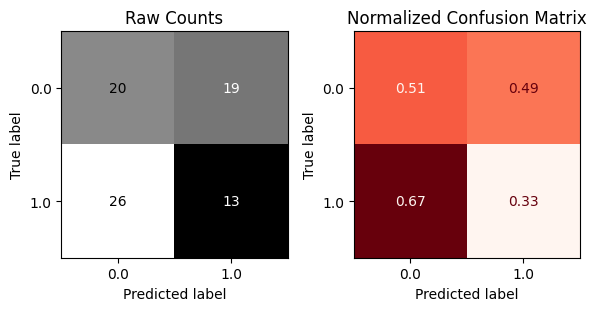

In [60]:
## Call the evaluate_classification function to obtain the model's metrics
evaluate_classification(knn_gs, X_train, y_train, X_test, y_test)

- The tuned KNN Model did not perform better than the default using the following parameters:

- n_neighbors': 9,
- weights': 'distance'

### **PCA**

### **Transformers**

In [61]:
df.shape

(312, 19)

In [62]:
# Instantiate the transformers
pca = PCA(n_components=19)

In [63]:
# Fit the transformer on the Train dataset
# Never fit on Test dataset
pca.fit(X_train_processed)

PCA(n_components=19)

In [64]:
# Transform the datasets
X_train_processed_pca_df = pca.transform(X_train_processed)
X_test_processed_pca_df = pca.transform(X_test_processed)

In [65]:
X_train_processed_pca_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
57,-2.942429,1.172699,-1.629365,1.148050,0.894997,-0.804331,-0.098818,1.407193,0.162858,0.662322,0.050577,0.000520,0.322865,0.387043,-0.117066,1.089915,-0.114881,0.077405,-0.002997
246,2.210969,3.669683,1.575675,-1.082141,-0.818615,3.322865,-1.546991,-0.022552,0.336596,2.406575,1.392860,-0.241223,0.622991,-0.567503,0.175496,-0.183575,0.437106,-0.287203,0.830569
85,1.959742,2.212014,0.501826,-1.389138,-0.160670,2.082871,-2.839256,0.489302,0.044515,2.848812,1.747107,0.535704,-0.716334,-0.629204,-0.439227,-0.286247,0.198049,0.011589,-0.139257
101,-2.178734,-0.607241,0.060877,-0.322113,1.256812,-0.951180,0.881933,1.783091,-0.125665,1.151261,0.775797,0.633296,0.187112,0.317310,-0.093471,-0.481880,0.057930,0.111241,0.047631
188,-0.854629,0.160995,0.079125,-0.639575,-0.773100,-0.182975,-0.566545,0.568843,-0.115255,-0.239851,0.079683,-0.123215,0.107646,0.570406,0.504397,-0.177719,0.012242,0.150082,-0.029401


In [66]:
# Note: this shows how much of the variance does each component explain
pd.Series(pca.explained_variance_ratio_)

0     0.263102
1     0.127674
2     0.090105
3     0.067656
4     0.063830
5     0.057414
6     0.053862
7     0.049157
8     0.043517
9     0.035839
10    0.031287
11    0.025294
12    0.021031
13    0.020269
14    0.015243
15    0.010928
16    0.009608
17    0.006676
18    0.004963
dtype: float64

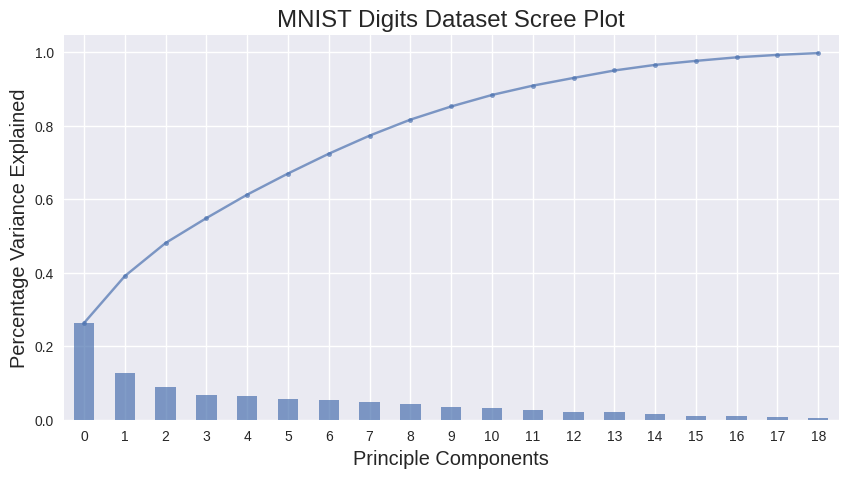

In [67]:
# Lets visual the cummulative sum of the variances

plt.style.use("seaborn")
plt.figure(figsize=(10,5))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
i = 0
for x in exp_var:
    total = total+x
    var_ls.append(total)
    #print('PC ' , i+1 , ' = ', x , 'Total = ', total)
    #i = i+1

# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker=".", alpha=0.7)

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("MNIST Digits Dataset Scree Plot", fontsize="xx-large")
plt.show();

##### **Comparing Model Training Time**



In [68]:
## Instantiate Models
## max_iter default value is 100
## set max_iter to 3500 to ensure model reaches convergence
logreg = LogisticRegression()
logreg_PCA = LogisticRegression(max_iter=3500)

In [69]:
# Measure how long it takes to train without PCA
%timeit logreg.fit(X_train_processed, y_train)

9.05 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
# Measure how long it takes to train with PCA
%timeit logreg_PCA.fit(X_train_processed_pca_df, y_train)

6.93 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### **Compare Model Accuracy Metric**


In [71]:
# Checking the accurancy of our model without PCA
print('Testing accuracy:', logreg.score(X_test_processed, y_test))

Testing accuracy: 0.6025641025641025


In [72]:
# Checking the accurancy of our model with PCA
print('Testing accuracy:', logreg_PCA.score(X_test_processed_pca_df, y_test))

Testing accuracy: 0.6025641025641025


##### **Model Pipelines**

### With PCA

In [73]:
## Create an instance of the model
log_reg = LogisticRegression(max_iter=3500)
## Create a model pipeline
log_reg_pipe = make_pipeline(preprocessor, pca, log_reg)
## Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('pca', PCA(n_components=19)),
                ('logisticregression', LogisticRegression(max_iter=3500))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58       115
         1.0       0.60      0.62      0.61       119

    accuracy                           0.59       234
   macro avg       0.59      0.59      0.59       234
weighted avg       0.59      0.59      0.59       234



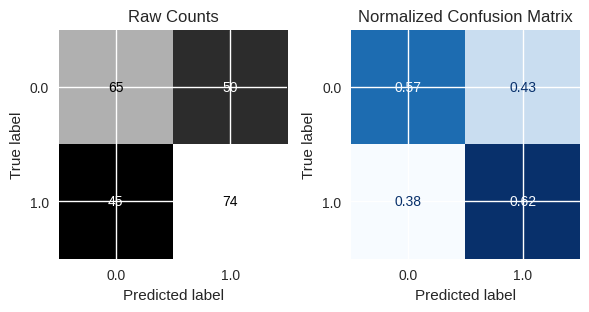


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55        39
         1.0       0.58      0.72      0.64        39

    accuracy                           0.60        78
   macro avg       0.61      0.60      0.60        78
weighted avg       0.61      0.60      0.60        78



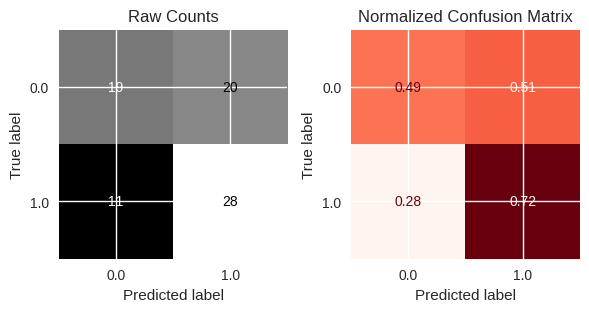

In [74]:
evaluate_classification(log_reg_pipe, X_train, y_train, X_test, y_test)

### NO PCA

In [75]:
## Create an instance of the model
log_reg = LogisticRegression(max_iter=3500)
## Create a model pipeline
log_reg_pipe_NoPCA = make_pipeline(preprocessor, log_reg)
## Fit the model

log_reg_pipe_NoPCA.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Status', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(max_iter=3500))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59       115
         1.0       0.60      0.63      0.62       119

    accuracy                           0.60       234
   macro avg       0.60      0.60      0.60       234
weighted avg       0.60      0.60      0.60       234



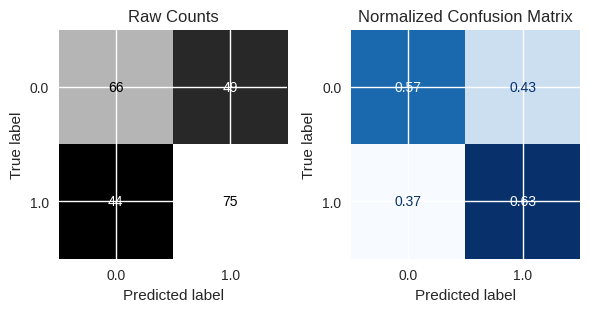


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55        39
         1.0       0.58      0.72      0.64        39

    accuracy                           0.60        78
   macro avg       0.61      0.60      0.60        78
weighted avg       0.61      0.60      0.60        78



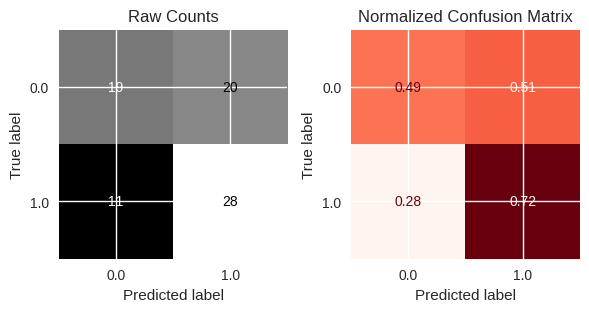

In [76]:
evaluate_classification(log_reg_pipe_NoPCA, X_train, y_train, X_test, y_test)

The PCA model did perform better than the model with No PCA with a faster time.  

# The best overall Model to utilize would be the PCA model.  The PCA model had the following:

- Highest overall test Accuracy of 60%
- Highest recall test average of 60%